In [ ]:
!pip install kaggle


In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.5/427.5 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle (1).json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Adjusts the permissions of the file.


In [ ]:
!kaggle datasets download -d dhanushnarayananr/credit-card-fraud


Dataset URL: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud
License(s): CC0-1.0
credit-card-fraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip credit-card-fraud.zip


Archive:  credit-card-fraud.zip
replace card_transdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd

# Adjust the file path if necessary based on the contents of the unzipped files.
data = pd.read_csv('card_transdata.csv')
print(data.head())  # Display the first few rows of the dataframe to confirm successful loading.


   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  


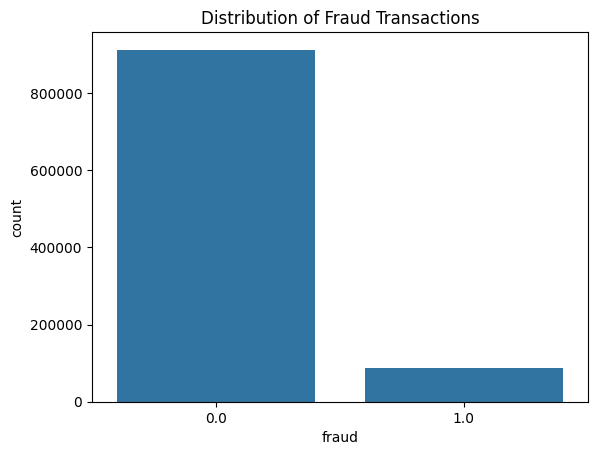

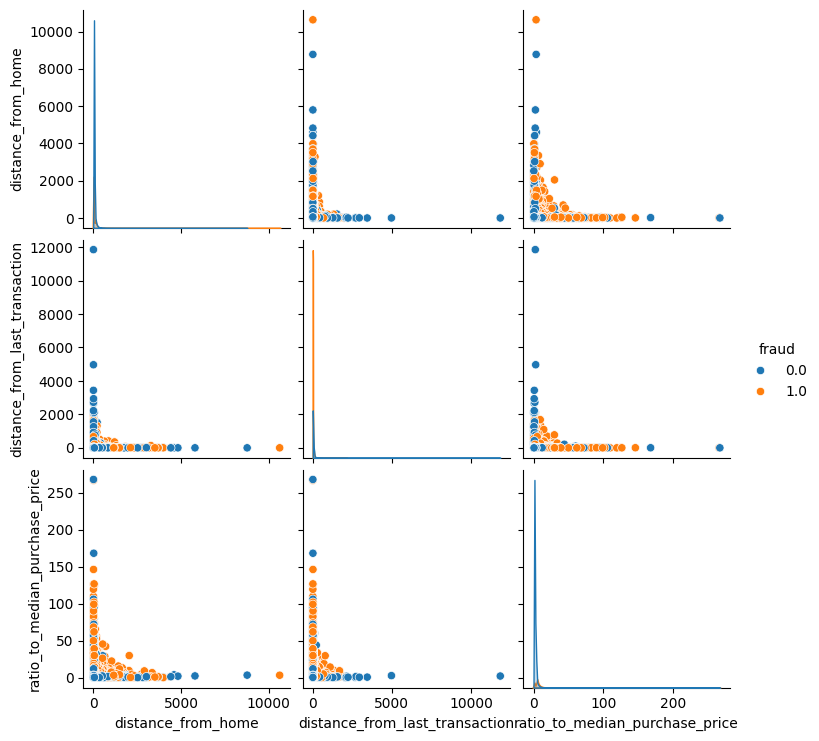

In [ ]:
print(data.columns)


Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('fraud', axis=1)
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())
print(y_train.head())


        distance_from_home  distance_from_last_transaction  \
566853           36.217183                        0.247838   
382311           20.673837                        0.573091   
241519            4.785209                        2.389048   
719220            5.911469                        1.238674   
905718           31.651844                        1.688151   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
566853                        0.181411              1.0        1.0   
382311                        0.663585              1.0        1.0   
241519                        3.537959              1.0        1.0   
719220                        0.283680              1.0        0.0   
905718                        0.174281              1.0        0.0   

        used_pin_number  online_order  
566853              0.0           1.0  
382311              0.0           1.0  
241519              0.0           1.0  
719220              0.0           1.0  
905718

In [ ]:
print(data.isnull().sum())


distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


In [ ]:
print("X_train columns:", X_train.columns)
print("y_train head:", y_train.head())


X_train columns: Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order'],
      dtype='object')
y_train head: 566853    0.0
382311    0.0
241519    0.0
719220    0.0
905718    0.0
Name: fraud, dtype: float64


In [ ]:
from autogluon.tabular import TabularPredictor



# Combine X_train and y_train for AutoGluon
# Note: This step is typically not necessary if your original data split was correct
train_data = X_train.copy()
train_data['fraud'] = y_train

# Initialize the predictor
predictor = TabularPredictor(label='fraud').fit(train_data)



No path specified. Models will be saved in: "AutogluonModels/ag-20240520_195424"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240520_195424"
=================== System

In [ ]:
y_pred = predictor.predict(X_test)
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.99999


In [ ]:
X_test_with_label = X_test.copy()
X_test_with_label['fraud'] = y_test
feature_importance = predictor.feature_importance(X_test_with_label)
print("Feature Importance:")
print(feature_importance)


Computing feature importance via permutation shuffling for 7 features using 5000 rows with 5 shuffle sets...
	8.72s	= Expected runtime (1.74s per shuffle set)
	5.47s	= Actual runtime (Completed 5 of 5 shuffle sets)


Feature Importance:
                                importance    stddev   p_value  n  p99_high  \
ratio_to_median_purchase_price     0.11144  0.006596  0.000001  5  0.125021   
online_order                       0.05372  0.004051  0.000004  5  0.062061   
distance_from_home                 0.03716  0.003018  0.000005  5  0.043374   
used_chip                          0.01824  0.001526  0.000006  5  0.021382   
used_pin_number                    0.01812  0.001942  0.000016  5  0.022119   
distance_from_last_transaction     0.01240  0.000837  0.000002  5  0.014123   
repeat_retailer                    0.00520  0.001631  0.001023  5  0.008558   

                                 p99_low  
ratio_to_median_purchase_price  0.097859  
online_order                    0.045379  
distance_from_home              0.030946  
used_chip                       0.015098  
used_pin_number                 0.014121  
distance_from_last_transaction  0.010677  
repeat_retailer                 0.001842  
